In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [2]:
# 1D-space

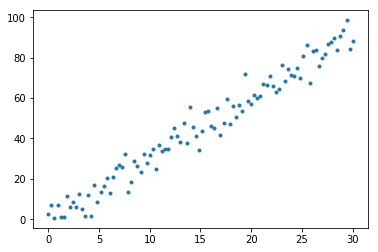

In [4]:
a = 0
b = 3

xs = np.linspace(0, 30, 100)
ys = a + xs*b + np.random.normal(scale=5, size=xs.shape[0])

plt.plot(xs, ys, '.')

In [23]:
# project onto new axis
X = (np.hstack([np.ones((xs.shape[0],1)), xs[:,np.newaxis]]))
y = ys[:,np.newaxis]
out = np.linalg.lstsq(X, y)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [24]:
X_fit = out[0]

In [25]:
y_exp = np.dot(X, X_fit)[:,0]

# get position on axis for each of these points
np.sqrt(y_exp**2 / np.sqrt(X[:,1]**2 + y_exp**2))

array([3.67172991e-08, 8.86382649e-01, 1.25353436e+00, 1.53525978e+00,
       1.77276530e+00, 1.98201186e+00, 2.17118521e+00, 2.34514806e+00,
       2.50706873e+00, 2.65914795e+00])

In [26]:
y_exp

array([-1.34816005e-15,  1.11111111e+00,  2.22222222e+00,  3.33333333e+00,
        4.44444444e+00,  5.55555556e+00,  6.66666667e+00,  7.77777778e+00,
        8.88888889e+00,  1.00000000e+01])

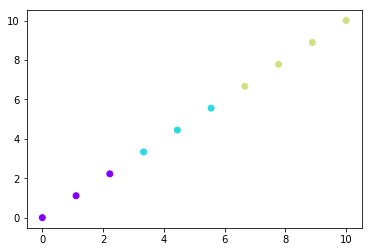

In [27]:
# define cut-offs at 1/3rd and 2/3rd
y_cut = y_exp.copy()
cut_1 = np.nanpercentile(y_exp, 33)
cut_2 = np.nanpercentile(y_exp, 66)

y_cut[y_exp < cut_1] = 0
y_cut[y_exp >= cut_1] = .33
y_cut[y_exp >= cut_2] = .66
y_cols = cm.rainbow(y_cut)

plt.scatter(xs, ys, color=y_cols)

In [28]:
# 2D-space

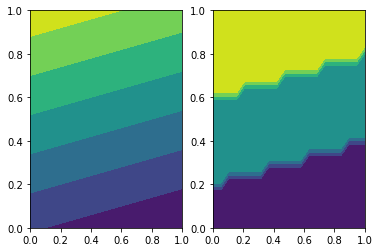

In [29]:
a = 0
b = -1
c = 5

xs = np.linspace(0, 1, 20)
ys = np.linspace(0, 1, 20)
X, Y = np.meshgrid(xs, ys)
z = a + X*b + Y*c

# rescale z to 0-1?
z = (z-z.min())/(z.max()-z.min())

f, ax = plt.subplots(1,2)

ax[0].contourf(X, Y, z)

z_cut = z.copy()
z_cut[z < .33] = 0
z_cut[z >= .33] = .33
z_cut[z >= .66] = .66

ax[1].contourf(X, Y, z_cut)

In [30]:
z.max()

1.0

In [31]:
# 3D

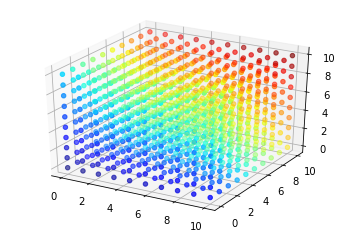

In [32]:
a = 0
b = 1
c = 5
d = 3

xs = np.linspace(0, 10, 10)
ys = np.linspace(0, 10, 10)
zs = np.linspace(0, 10, 10)
X, Y, Z = np.meshgrid(xs, ys, zs)
O = a + X*b + Y*c + Z*d

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter3D(X, Y, Z, c=cm.jet(O.ravel()/O.max()))

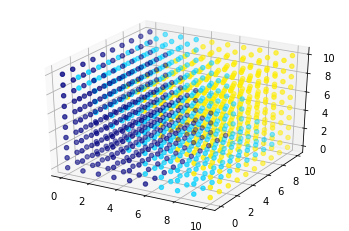

In [33]:
a = 0
b = 10
c = 0
d = 6

xs = np.linspace(0, 10, 10)
ys = np.linspace(0, 10, 10)
zs = np.linspace(0, 10, 10)
X, Y, Z = np.meshgrid(xs, ys, zs)
O = a + X*b + Y*c + Z*d

O_cut = O.copy()
cut_1 = np.nanpercentile(O_cut, 33)
cut_2 = np.nanpercentile(O_cut, 66)

O_cut[O < cut_1] = 0
O_cut[O >= cut_1] = .33
O_cut[O >= cut_2] = .66

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter3D(X, Y, Z, c=cm.jet(O_cut.ravel()))


In [34]:
# include logistic

In [42]:
def logistic(L, x0, k=50, t_=np.linspace(0., 1., 1000)):
    x0 = x0*(t_.max()-t_.min()) + t_.min()  # scale x0 to t_
    return L/(1+np.exp(-k*(t_-x0)))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


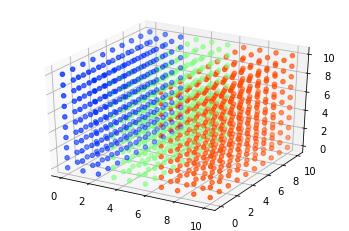

In [48]:
kappa=500
a = 0
b = 1
c = 0
d = 0

xs = np.linspace(0, 10, 10)
ys = np.linspace(0, 10, 10)
zs = np.linspace(0, 10, 10)
X, Y, Z = np.meshgrid(xs, ys, zs)
O = a + X*b + Y*c + Z*d


#O = (O-O.min())/(O.max()-O.min())

# finally, add "expected values"
fnl = 0.5 + logistic(-0.33, 0.33, -kappa, O) + logistic(0.33, 0.66, kappa, O)


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter3D(X, Y, Z, c=cm.jet(fnl.ravel()))

In [19]:
# in theory this works well..

## Finally, assume that new vector O has a length of 1
$length = np.sqrt(a^2 + b^2 + c^2) = 1$, fix c

so

$1^2 = a^2 + b^2 + c^2$

$1^2 - a^2 - b^2 = c^2$

$sqrt(1^2 - a^2 - b^2) = c$


--> only a and b need to be estimated
(length 1 is arbitrary but it keeps a and b in a low range, easier to set bounds for the optimizer)